#### STA 141C - Big Data & High Performance Statistical Computing Spring 2022

#### Homework # 1

##### JONGWOOk CHOE

##### March 21, 2022


In [96]:
import numpy as np
import numpy.linalg as inv
from scipy import stats
import math
import pandas as pd
import matplotlib.pyplot as plt
import time


1.  The following facts about triangular matrices are useful for understanding the algorithms that will be mentioned in class. Please create some arbitrary matrices in R or python and verify the following facts:

- The product of two upper triangular matrices is upper triangular.
- The inverse of a lower triangular matrix is lower triangular.
- The product of two unit lower triangular matrices is unit lower triangular.
- The inverse of a unit upper triangular matrix is unit upper triangular.

Note that a unit triangular matrix is a triangular matrix with all diagonal entries being 1.


In [2]:
# Generate random matirces

A1 = np.random.randint(10, size=(4, 4))
A2 = np.random.randint(10, size=(4, 4))

# Create two upper triangular matrices.
U1 = np.triu(A1)
U2 = np.triu(A2)

# Create two lower triangular matrices.
L1 = np.tril(A1)
L2 = np.tril(A2)


In [3]:
# Product of two upper tirangular matirces is upper triangular.
print(U1*U2)


[[24 35  7 40]
 [ 0 10 54  3]
 [ 0  0 36  0]
 [ 0  0  0 81]]


In [4]:
# Inverse of a lower triangular matrix is lower triangular.
print(np.linalg.inv(L1))


[[ 2.50000000e-01  1.38777878e-17  1.85037171e-17 -5.32298710e-18]
 [-1.00000000e+00  5.00000000e-01 -7.40148683e-17  2.12919484e-17]
 [ 1.38888889e-01 -1.66666667e-01  1.11111111e-01 -9.12512075e-18]
 [ 2.25308642e-01 -1.48148148e-01 -8.64197531e-02  1.11111111e-01]]


In [5]:
# Product of two lower tirangular matirces is unit lower triangular.
print(L1*L2)


[[24  0  0  0]
 [56 10  0  0]
 [42  9 36  0]
 [16 45 35 81]]


In [6]:
# Inverse of a unit upper triangular matrix is unit upper triangular.
uL1 = L1
uL1[np.diag_indices_from(uL1)] = 1
print("Unit upper triangular matrix")
print(uL1)
print("Inverse of a unit upper triangular matrix")
print(np.linalg.inv(uL1))


Unit upper triangular matrix
[[1 0 0 0]
 [8 1 0 0]
 [7 3 1 0]
 [8 5 7 1]]
Inverse of a unit upper triangular matrix
[[  1.   0.   0.   0.]
 [ -8.   1.   0.   0.]
 [ 17.  -3.   1.  -0.]
 [-87.  16.  -7.   1.]]


2.  Let a = 0.7, b = 0.2, and c = 0.1

- Test whether (a + b) + c equals 1;
- Test whether a + (b + c) equals 1;
- Test whether (a + c) + b equals 1;
- Explain what you found. (For example, you can find the internal representation of these numbers.)


In [7]:
a = 0.7
b = 0.2
c = 0.1


In [8]:
# Test (a+b)+c
(a+b)+c


0.9999999999999999

In [9]:
# Test a+(b+c)
a+(b+c)


1.0

In [10]:
# Test (a+c)+b
(a+c)+b


1.0

We were able to get exact value of 1.0 as an answer except when we compute (a+b)+c. Since the float type in Python follows double precision of the IEEE Standard 754 model, Python stores float type number in to the memory as slightly different value. Therefore, when we print out 0.7, 0.2, and 0.1 up to 10^-56 places, we would get the values below.


In [11]:
# Print out the actual decimal points of each floats.
print(format(0.7, '.56f'))
print(format(0.2, '.56f'))
print(format(0.1, '.56f'))


0.69999999999999995559107901499373838305473327636718750000
0.20000000000000001110223024625156540423631668090820312500
0.10000000000000000555111512312578270211815834045410156250


The numbers above are the actual float point that Python uses for 0.7, 0.2, 0.1. Due to this, when we add 0.7 and 0.2 first and print out the result up to 10^-56 places, we get the number very slightly lower than 0.9. These subtle differences make Python to show us $0.9999\cdots$ when we add 0.7 and 0.2 first and add 0.1 later.


3. Create the vector x = (0.988, 0.989, 0.990, . . . , 1.010, 1.011, 1.012).

- Plot the polynomial $y=x^7−7x^6+21x^5−35x^4+35x^3−21x^2+7x−1$ at each point in x
- Plot the polynomial $y = (x − 1)^7$ at each point in x
- Explain what you found.


In [12]:
# create a vector of range(0.988, 1.012)

vector_x = np.arange(0.988, 1.012, 0.001)


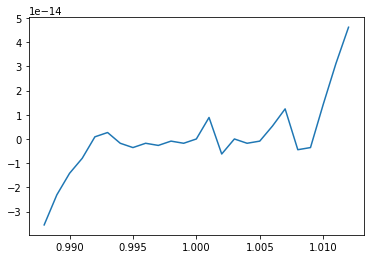

In [13]:
# Formula
yval = vector_x**7 - 7*vector_x**6 + 21*vector_x**5 - 35 * \
    vector_x**4 + 35*vector_x**3 - 21*vector_x**2 + 7*vector_x - 1

# x represents each value in vector_x and y represents the y value of each corresponding x value
plt.plot(vector_x, yval)


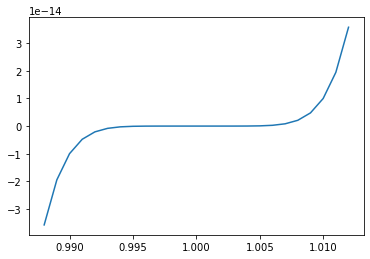

In [14]:
# Formula
yval = (vector_x - 1)**7

plt.plot(vector_x, yval)


Compare to the second polynomial graph, the first polynomial graph has more deviation.


4. Read in the matrix in the file ‘oringp.dat’ on the failure of O-rings leading to the Challenger disaster. The columns are flight number, date, number of O-rings, number failed, and temperature at launch. Compute the correlation between number of failures and temperature at launch, deleting the last, missing observation (the disaster).


In [15]:
# read oringp data
df = pd.read_csv("oringp.dat", header=None, sep="\s+")

# rename the column name
df.rename(columns={0: "flight_num", 1: "date", 2: "O_rings",
          3: "failed_num", 4: "temp"}, inplace=True)

df


,flight_num,date,O_rings,failed_num,temp
0,1,4/12/81,6,0.0,66
1,2,11/12/81,6,1.0,70
2,3,3/22/82,6,0.0,69
3,5,11/11/82,6,0.0,68
4,6,4/04/83,6,0.0,67
5,7,6/18/83,6,0.0,72
6,8,8/30/83,6,0.0,73
7,9,11/28/83,6,0.0,70
8,41-B,2/03/84,6,1.0,57
9,41-C,4/06/84,6,1.0,63


In [16]:
# Drop the row that contains NA
df.drop([23], inplace=True)
df.tail()


,flight_num,date,O_rings,failed_num,temp
18,51-I,8/27/85,6,0.0,76
19,51-J,10/03/85,6,0.0,79
20,61-A,10/30/85,6,2.0,75
21,61-B,11/26/85,6,0.0,76
22,61-C,1/12/86,6,1.0,58


In [17]:
# Compute correlation between number of failures and temperature at launch
df['failed_num'] = pd.to_numeric(df['failed_num'])
corr = df['failed_num'].corr(df['temp'])

print(
    f"The correlation between number of failures and temperature at launch: {corr}")


The correlation between number of failures and temperature at launch: -0.5613284258418355


5. (Challenging!) Consider the mixed effect model
   $$y_i =x^′_i\beta+z_i^′\gamma+\epsilon_i, i=1,\cdots,n,$$
   where $\epsilon_i \sim N(0,\sigma_0^2)$ are independent normal errors, $\beta \in \mathbb{R}^p$ are fixed effects, $\gamma \in \mathbb{R}^q$ are random effects assumed to be $N(0_q,\sigma_1^2I_q), \gamma$ and $\epsilon_i$ are independent. For simplicity, assume $\mu_i = x^′_i\beta$. Let $y = (y_1,\cdots,y_n)^′, \mu = (\mu_1,\cdots,\mu_n)^′, Z = (z_1,\cdots,z_n)^′$, then $y \in \mathbb{R}^n, \mu \in \mathbb{R}^n, Z \in \mathbb{R}^{n\times q}$, and $y \sim N(\mu,\sigma_1^2ZZ^′ + \sigma_0^2I_n)$. Our goal is to evaluate its log-density function given by

$$-\frac{n}{2}\text{log}(2\pi) − \frac{1}{2} \text{log}(\text{det}(\sigma_1^2ZZ^′ + \sigma_0^2I_n)) − \frac{1}{2}(y − \mu)^′(\sigma_1^2ZZ^′ + \sigma_0^2I_n)^{−1}(y − \mu).\,\,\,\,\,\,\,\,\,\text{(1,1)}$$

1. Choose $n (\geq 100)$ and $q = 5$, randomly choose a value for $\sigma_0, \sigma_1,$ and a vector $\mu$, a matrix $Z$ respectively. Use them to generate $y$ (note that $y$ can be generated from a multivariate normal density $N(\mu,\sigma_1^2ZZ^′ + \sigma_0^2I_n); y$ is a $n\times  1$ vector. You should use set.seed function in R or np.random.seed function in numpy before generating $y$).
2. Use the default package in R or numpy to evaluate the log-density function (e.g., in R, use dmvnorm(y y, mu = mu, Sigma = Sigma, log = TRUE)). Note that: Sigma = $\sigma_1^2ZZ^′ + \sigma_0^2I_n.$

3. Apply the Woodbury formula
   $$(A + UV^′)^{−1} = A^{−1} − A^{−1}U(I_m + V^′A^{−1}U)^{−1}V^′A^{−1},$$
   where $A \in \mathbb{R}^{n\times n}, U,V \in \mathbb{R}^{n\times m}$ to rewrite $(\sigma_1^2ZZ^′ +\sigma_0^2I_n)^{−1}$ and apply the matrix determinant lemma $\text{det}(A+UV^′)=\text{det}(A)\text{det}(I_m +V^′A^{−1}U)$ to re-write $\text{det}(\sigma_1^2ZZ^′ +\sigma_0^2I_n).$ Plugging-in the two terms and rewrite the log-density function in (1.1).

4. We now ready to write a function to evaluate the log-density by yourself using the formula you derived in question 3. Call this function
   $$\text{dmvnorm\_ lowrank(y, mu, Z, sigma0, sigma1, log = FALSE).}$$
   The inputs of the function should be $y, \mu, Z, \sigma_0,\text{ and }\sigma_1$ and the output of this function should be the density function if log = FALSE and should be the log-density function if log = TRUE. The default output of the function should be log = FALSE.

5. Test you function by plugging-in the same values of $y, \mu, Z, \sigma_0,\text{ and }\sigma_1$ in (1) into the **dmvnorm_lowrank** function. The output should be the same as in question 2.

6. Compare the computational speeds between your function and the default package used in question 2. Comment on your findings.

7. (extra credit, 1 point) Increase n (but keep q the same) and try questions 1-6 again. Comment on your findings.


In [18]:
# 1.
np.random.seed(10)
mu = np.random.randint(5, size=100)
Z = np.random.randint(5, size=(100, 5))
sigma0 = 2
sigma1 = 1
sigma = sigma1**2*np.mat(Z)*np.mat(np.transpose(Z))+sigma0**2*np.identity(100)

y = np.random.multivariate_normal(mu, sigma, size=None)


In [19]:
np.shape(y)


(100,)

In [20]:
print(y)


[-1.96548242e+00  2.37761466e+00 -7.00168191e+00  1.12168024e+00
  3.75438570e+00  4.71512494e+00 -9.73197897e-01 -1.89784033e+00
 -2.40821061e+00  2.77614332e+00 -6.12135575e-01 -2.87152222e+00
 -1.95831781e+00 -5.35255765e-01 -4.06160046e+00  4.25106213e+00
  2.66921597e+00 -5.95029862e-01  4.28424194e+00 -1.92612229e+00
 -6.91450653e+00  3.12377150e+00  1.11818589e+00  2.72406131e+00
  1.89016372e+00  1.08210714e+00 -3.35055994e+00  7.14359191e-02
  5.90382928e+00 -2.50648975e+00  3.41915853e+00 -1.76818351e+00
 -3.66867533e+00 -5.85477742e+00 -7.20378417e-01  5.06479229e+00
 -3.60545927e+00  2.39700038e+00 -2.44508450e+00 -2.64086650e+00
 -4.23951755e-01  9.08297098e-01 -5.34858058e+00  3.91745243e+00
 -4.81944095e+00 -3.42665754e+00  1.34776161e-01  1.62825188e-01
 -2.41037041e+00 -3.93306538e+00  2.18496667e+00 -9.83877505e-01
  1.44860477e+00 -2.33310249e+00 -5.48066214e-01 -3.62875177e+00
  1.10441538e+00  4.45128525e+00 -3.36671226e+00  9.41112520e-01
  2.14232676e+00  8.52558

In [21]:
# 2
result = stats.multivariate_normal.logpdf(y, mu, sigma)
print(result)


-219.91799434121359


3.

From the Woodbury formula
$$(A + UV^′)^{−1} = A^{−1} − A^{−1}U(I_m + V^′A^{−1}U)^{−1}V^′A^{−1},$$
where $A \in \mathbb{R}^{n\times n}, U,V \in \mathbb{R}^{n\times m}$

$(\sigma_1^2ZZ^′ +\sigma_0^2I_n)^{−1}=(\sigma_0^2I_n)^{-1}-(\sigma_0^2I_n)^{-1}\sigma_1Z (I_m+\sigma_1Z^{'}(\sigma_0^2I_n)^{-1}\sigma_1Z)^{-1}\sigma_1Z^{'}(\sigma_0^2I_n)^{-1}$

Also using the fact
$$\text{det}(A+UV^′)=\text{det}(A)\text{det}(I_m +V^′A^{−1}U)$$

$\text{det}(\sigma_1^2ZZ^′ +\sigma_0^2I_n)=\text{det}(\sigma_0^2I_n)\text{det}(I_m+\sigma_1Z^{'}(\sigma_0^2I_n)^{-1}\sigma_1Z)$


In [124]:
# 4
def dmvnorm_lowrank(y, mu, Z, sigma0, sigma1, log = False):
    U = sigma1*np.mat(Z)
    V = sigma1*np.mat(Z)
    VT= np.transpose(V)
    n = np.shape(U)[0]
    m = np.shape(U)[1]
    A = sigma0**2*np.identity(n)

    lemma = inv.det(A)*inv.det(np.identity(m)+inv.multi_dot([VT,inv.inv(A),U]))
    wood = inv.inv(A)-inv.multi_dot([inv.inv(A),U,inv.inv(np.identity(m)+inv.multi_dot([VT,inv.inv(A),U])),VT,inv.inv(A)])
    log_density = -n/2*np.log(2*math.pi)-1/2*np.log(lemma)-1/2*inv.multi_dot([np.transpose(y-mu),wood,(y-mu)])
    if log == True:
        return log_density
    else:
        return math.exp(log_density)


In [125]:
#5
dmvnorm_lowrank(y,mu,Z,sigma0,sigma1,True)

-219.91799434121356

In [126]:
dmvnorm_lowrank(y,mu,Z,sigma0,sigma1)

3.0961970062565645e-96

In [127]:
# 6
t0= time.process_time()
stats.multivariate_normal.logpdf(y, mu, sigma)
t1= time.process_time() - t0
print(t1-t0)


-40.040529


In [128]:
t0= time.process_time()
dmvnorm_lowrank(y,mu,Z,sigma0,sigma1,True)
t1= time.process_time() - t0
print(t1-t0)


-40.64315


In [133]:
# 7
np.random.seed(11)
mu = np.random.randint(5, size=10000)
Z = np.random.randint(5, size=(10000, 5))
sigma0 = 2
sigma1 = 1
sigma = sigma1**2*np.mat(Z)*np.mat(np.transpose(Z))+sigma0**2*np.identity(10000)

y = np.random.multivariate_normal(mu, sigma, size=None)


In [134]:
t0= time.process_time()
stats.multivariate_normal.logpdf(y, mu, sigma)
t1= time.process_time() - t0
print(t1-t0)

-980.7693210000002


In [135]:
t0= time.process_time()
dmvnorm_lowrank(y,mu,Z,sigma0,sigma1,True)
t1= time.process_time() - t0
print(t1-t0)

-947.7853340000001


6. In class we learnt about the BLAS and how it has become a de facto standard for basic linear algebra operations. Both R and numpy use the BLAS and LAPACK libraries extensively to accelerate certain types of operations. Apart from \*, %\*%, **eigen**, and **qr**, find out two other common functions use the BLAS and LAPACK routines to speed up calculations.


In `numpy`, linear algebra functions rely on `BLAS` and `LAPACK`. For example the function `numpy.linalg.matrix_power(a,n)`. This helps user to calculate the square matrix to the power n. Since this function uses matrix multiplication to get the result, it is `level 3 BLAS` subroutine which does matrix-matrix operations.
